In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('E:\\AI & Machine Learning\\Projects\\RNN\\Fake-News-Classification\\archive\\WELFake_Dataset.csv')

In [5]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [6]:
df.shape

(72134, 4)

## **EDA(Exploratory Data Analysis)**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


#### **Missing data analysis**

In [11]:
# Missing data analysis
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
## Droping the non values
df=df.dropna()

In [9]:
df.shape

(71537, 4)

In [12]:
# Missing data analysis after droping the non values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

#### **Drop unused columns**

In [15]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
df.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1
10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1


#### **Class distribution**

<Axes: ylabel='label'>

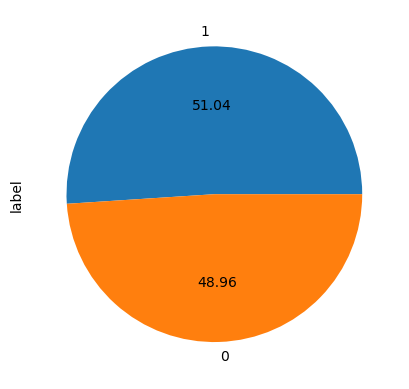

In [17]:
df['label'].value_counts().plot.pie(autopct='%.2f') # 0 is for real news and 1 is for fake news

#### **Define X and y variables**

In [19]:
x=df.drop(columns=['label']) # Independent feature, drop means remove the label column from the dataset
y=df['label'] # Dependent feature

In [21]:
x.shape

(71537, 2)

In [22]:
y.shape

(71537,)

In [23]:
x.head(10)

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o..."
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ..."
10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...


In [24]:
y.head(10)  

0     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: label, dtype: int64

In [25]:
# Vocab_size = Unique words in our Corpus (entire document)
vocab_size = 10000

In [26]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [66]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM   
from tensorflow.keras.layers import Dense # For output layer 

In [34]:
messages = x.copy()
messages.reset_index(inplace=True) 
# Resetting the index because we have removed some rows from the dataset

In [39]:
messages.title[1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

#### **Lemmatization**

In [46]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lm = WordNetLemmatizer() # Lemmatization

stopwords = stopwords.words('english')
corpus = []
for i in range(len(messages)):
    review = re.sub('^a-zA-Z0-9',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    review =[lm.lemmatize(x) for x in review if x not in stopwords]
    review = " ".join(review)
    corpus.append(review)

In [47]:
corpus[:10]

['law enforcement high alert following threat cop white 9-11by #blacklivesmatter #fyf911 terrorist [video]',
 'unbelievable! obama’s attorney general say charlotte rioter “peaceful” protesters…in home state north carolina [video]',
 'bobby jindal, raised hindu, us story christian conversion woo evangelicals potential 2016 bid',
 'satan 2: russia unvelis image terrifying new ‘supernuke’ – western world take notice',
 'time! christian group sue amazon splc designation hate group',
 'dr ben carson targeted irs: “i never audit spoke national prayer breakfast.”',
 'house intel chair trump-russia fake story: “no evidence anything” [video]',
 'sport bar owner ban nfl games…will show ‘true american’ sports: ‘i’d like speak rural america’ [video]',
 'latest pipeline leak underscore danger dakota access pipeline',
 'gop senator smacked punchable alt-right nazi internet']

In [48]:
max_length = max(len(sentence.split()) for sentence in corpus)
print("Maximum sentence length:", max_length)

Maximum sentence length: 51


In [49]:
len(corpus)

71537

####  **one-hot representation**

In [50]:
# converting the text (Corpus) into One Hot Representation
onehot_repr = [one_hot(words,vocab_size) for words in corpus]

In [51]:
onehot_repr[:10]

[[5208,
  809,
  2131,
  1120,
  7443,
  188,
  67,
  3761,
  6185,
  3268,
  2763,
  5863,
  2254,
  8582],
 [7312,
  7639,
  6670,
  8090,
  3751,
  5873,
  4975,
  6339,
  5358,
  9544,
  1635,
  8781,
  9560,
  8582],
 [2144, 9036, 4435, 2315, 5537, 4605, 1517, 7251, 5280, 6428, 3896, 930, 5605],
 [1025, 79, 2763, 6253, 6328, 567, 3388, 9976, 3741, 5803, 9239, 2152, 1962],
 [430, 1517, 558, 9151, 4999, 7586, 5090, 4560, 558],
 [5921,
  1300,
  4105,
  8745,
  8601,
  9005,
  7870,
  6605,
  9016,
  9805,
  7751,
  8924,
  8070],
 [7048, 4189, 5590, 7545, 2763, 1582, 4605, 2912, 9417, 6868, 8582],
 [6314,
  3374,
  7882,
  2172,
  194,
  204,
  6253,
  9954,
  3672,
  7143,
  7321,
  7394,
  514,
  8586,
  8279,
  8582],
 [1813, 5713, 7222, 2386, 492, 9330, 4027, 5713],
 [5479, 3784, 4885, 4317, 1593, 1327, 8566, 9110]]

#### **Embedding**

In [54]:
sent_length = 52
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [55]:
embedded_docs[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 5208,  809, 2131, 1120, 7443,  188,
          67, 3761, 6185, 3268, 2763, 5863, 2254, 8582],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 7312, 7639, 6670, 8090, 3751, 5873,
        4975, 6339, 5358, 9544, 1635, 8781, 9560, 8582],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 2144, 9036, 4435, 2315, 5537

In [56]:
embedded_docs.shape

(71537, 52)

In [58]:
embedded_docs[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 5921, 1300, 4105, 8745, 8601,
       9005, 7870, 6605, 9016, 9805, 7751, 8924, 8070])

## **Creating LSTM Model**

In [65]:
embedded_vector_features = 200 # Number of features in the embedded layer
model=Sequential()
model.add(Embedding(vocab_size,embedded_vector_features,input_length=sent_length))
model.add(LSTM(100)) # 100 neurons
model.add(Dropout(0.2)) # Dropout layer to avoid overfitting
model.add(Dense(1,activation='sigmoid')) # Output layer, 1 neuron because we have only 2 classes
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
# Binary_crossentropy because we have only 2 classes , if we have more than 2 classes then we use categorical_crossentropy
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 52, 200)           2000000   
                                                                 
 lstm_4 (LSTM)               (None, 100)               120400    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2120501 (8.09 MB)
Trainable params: 2120501 (8.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [67]:
len(embedded_docs),y.shape

(71537, (71537,))

In [69]:
import numpy as np

In [71]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [72]:
X_final.shape,y_final.shape

((71537, 52), (71537,))

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
# random_state is used to get the same result every time

## **Model Training**

In [74]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10


1498/1498 [==============================] - 144s 93ms/step - loss: 0.2772 - accuracy: 0.8824 - val_loss: 0.2301 - val_accuracy: 0.9045
Epoch 2/10
1498/1498 [==============================] - 149s 100ms/step - loss: 0.1622 - accuracy: 0.9351 - val_loss: 0.2277 - val_accuracy: 0.9064
Epoch 3/10
1498/1498 [==============================] - 147s 98ms/step - loss: 0.1059 - accuracy: 0.9595 - val_loss: 0.2895 - val_accuracy: 0.9058
Epoch 4/10
1498/1498 [==============================] - 144s 96ms/step - loss: 0.0654 - accuracy: 0.9751 - val_loss: 0.3448 - val_accuracy: 0.9037
Epoch 5/10
1498/1498 [==============================] - 141s 94ms/step - loss: 0.0390 - accuracy: 0.9862 - val_loss: 0.4015 - val_accuracy: 0.9027
Epoch 6/10
1498/1498 [==============================] - 147s 98ms/step - loss: 0.0264 - accuracy: 0.9905 - val_loss: 0.4814 - val_accuracy: 0.8973
Epoch 7/10
1498/1498 [==============================] - 157s 104ms/step - loss: 0.0185 - accuracy: 0.9935 - val_los

#### **Performance Metrics**

In [100]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test)

738/738 [==============================] - 15s 20ms/step


In [102]:
y_pred


array([[9.9988848e-01],
       [3.5549284e-04],
       [1.9464030e-06],
       ...,
       [9.9999988e-01],
       [1.0000000e+00],
       [2.9229818e-07]], dtype=float32)

In [109]:
y_pred=np.where(y_pred > 0.6, 1,0) # If the value is greater than 0.6 then it will be 1 otherwise 0

In [110]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [111]:
y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred)

0.8922822771941714

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     11693
           1       0.87      0.92      0.90     11915

    accuracy                           0.89     23608
   macro avg       0.89      0.89      0.89     23608
weighted avg       0.89      0.89      0.89     23608



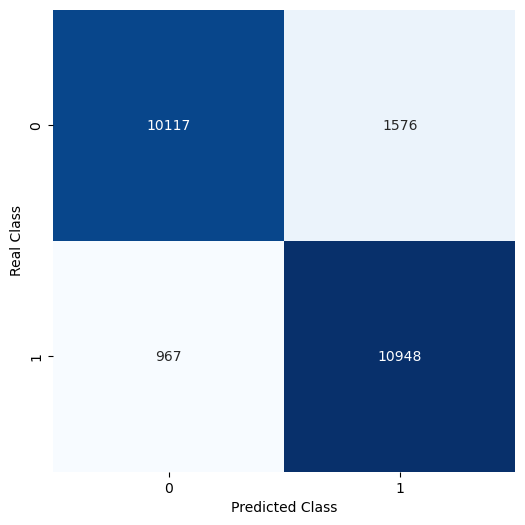

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [116]:
model.save("fake News classification.h5")

c:\Users\laksh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
